In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline

In [78]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

In [79]:
from pandas import read_csv
er = pd.read_csv("USDCNY(2011-2021).csv", header=0)
er.head(5)

,slug,date,open,high,low,close,currency
0,USD/CNY,2011/1/3,6.5800,6.5800,6.5800,6.5916,CNY
1,USD/CNY,2011/1/4,6.5988,6.6000,6.5970,6.5800,CNY
2,USD/CNY,2011/1/5,6.6112,6.6112,6.5775,6.5970,CNY
3,USD/CNY,2011/1/6,6.6134,6.6165,6.6134,6.5775,CNY
4,USD/CNY,2011/1/7,6.6209,6.6209,6.6175,6.6165,CNY


In [80]:
er.date = pd.to_datetime(er.date)
er.set_index("date", inplace=True)

In [81]:
month_index = er.index.to_period('M')

In [82]:
er.head()

,slug,open,high,low,close,currency
date,,,,,,
2011-01-03,USD/CNY,6.5800,6.5800,6.5800,6.5916,CNY
2011-01-04,USD/CNY,6.5988,6.6000,6.5970,6.5800,CNY
2011-01-05,USD/CNY,6.6112,6.6112,6.5775,6.5970,CNY
2011-01-06,USD/CNY,6.6134,6.6165,6.6134,6.5775,CNY
2011-01-07,USD/CNY,6.6209,6.6209,6.6175,6.6165,CNY


In [83]:
er.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30'],
              dtype='datetime64[ns]', name='date', length=2755, freq=None)

In [59]:
er.loc['2017-08-10']

slug        USD/CNY
open         6.6711
high         6.6965
low          6.6474
close        6.6718
currency        CNY
Year           2017
Month             8
Weekday           3
Name: 2017-08-10 00:00:00, dtype: object

In [10]:
er.loc['2014-01-20':'2014-01-22']

,slug,open,high,low,close,currency,Year,Month,Weekday
date,,,,,,,,,
2014-01-20,USD/CNY,6.0403,6.0448,6.0403,6.0403,CNY,2014,1,0
2014-01-21,USD/CNY,6.0428,6.1010,6.0398,6.0428,CNY,2014,1,1
2014-01-22,USD/CNY,6.0406,6.1085,6.0401,6.0406,CNY,2014,1,2


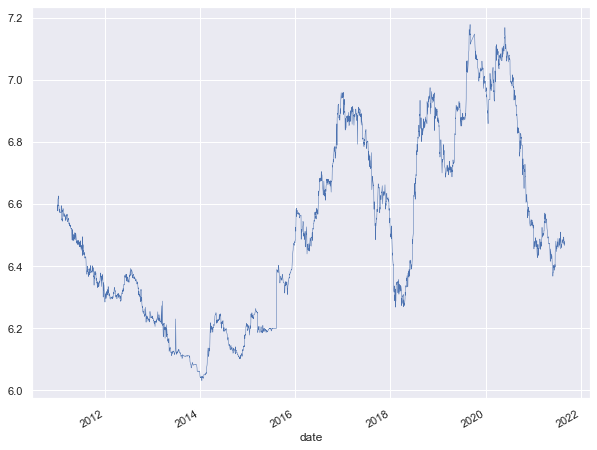

In [85]:
er['close'].plot(linewidth=0.5, figsize=(10,8));

Text(0, 0.5, 'USD/CNY Price Value')

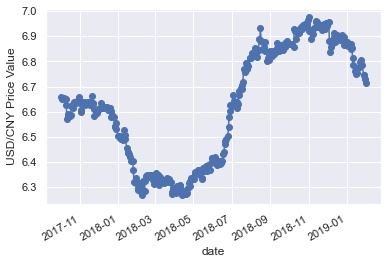

In [87]:
cd = er.loc['2017-10':'2019-1', 'close'].plot(marker='o', linestyle='-')
cd.set_ylabel('USD/CNY Price Value')

Text(0, 0.5, 'USD/CNY Price Value')

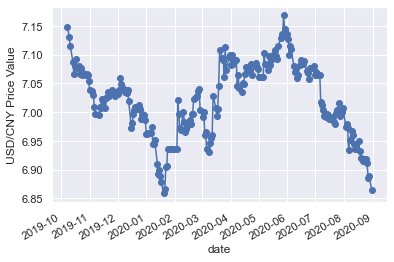

In [86]:
cd = er.loc['2019-10':'2020-8', 'close'].plot(marker='o', linestyle='-')
cd.set_ylabel('USD/CNY Price Value')

In [13]:
er_price = er[['close']]

In [88]:
valid_start = '2019-8-1'
test_start =  '2020-8-3'

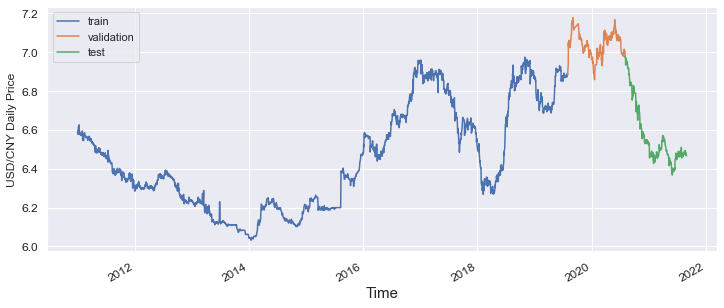

In [89]:
er_price[: valid_start][['close']].rename(columns={'close':'train'}) \
    .join(er_price[valid_start: test_start][['close']] \
          .rename(columns={'close':'validation'}), how='outer') \
    .join(er_price[test_start:][['close']].rename(columns={'close':'test'}), how='outer') \
    .plot(y=['train', 'validation', 'test'], figsize=(12, 5), fontsize=12)
plt.xlabel('Time', fontsize=15)
plt.ylabel('USD/CNY Daily Price', fontsize=12)
plt.show()

In [93]:
data_columns = ['close']
# Resample to weekly frequency, aggregating with mean
er_weekly_mean = er[data_columns].resample('W').mean()
er_weekly_mean.head(3)

,close
date,
2011-01-09,6.59252
2011-01-16,6.60868
2011-01-23,6.57728


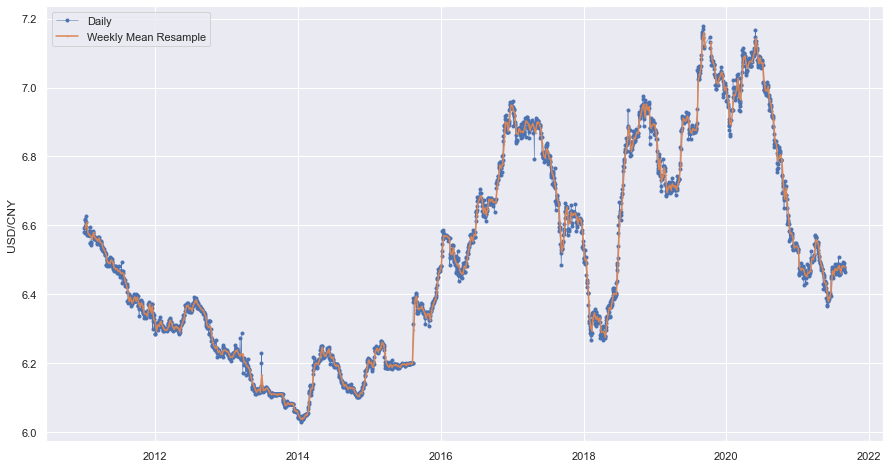

In [95]:
start, end = '2011-01', '2021-08'
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(er.loc[start:end, 'close'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(er_weekly_mean.loc[start:end, 'close'], marker='.', markersize=1, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('USD/CNY')
ax.legend();